# Investigating And Analyzing The Titanic Data

The goal of this notebook is to give an overview of the insights we can get from exploring the data from the shipwreck of the HMS Titanic. 

This is done for the Udacity Data Analyst Nanodegree, Problem Set 2

*—Dumky de Wilde, Amsterdam, Jan. 2016*

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#The original data comes from the Kaggle website: https://www.kaggle.com/c/titanic
titanic_data = pd.read_csv('titanic_data.csv')

In [4]:
#Let's take a look:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Looks like the data is coming in fine, but we can already see that there'll probably be a lot of missing values, as is to be expected from data that's 100 years old. Let's see what the damage is and what we can do about that.

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


As we can see from the count there are a lot of values missing from the 'Cabin' column and quite a few from the 'Age' column. We could just drop these, especially the 'Cabin' column, but I think there might be an interesting perspective by looking at the difference in survival rate for entries that have been filled and entries that are NaN's. One reason data might be missing is because the person, as well as his or her family, did not make it out alive and thus was unable to provide information.

Some interesting things that jump out right away:
* The overall survival rate is .38
* The oldest recorded age is 80, which seems possible, but the youngest recorded is 0.42. That's not impossible, but it's a strange notation, something to look into.
* Most people seem to be in third, the lowest, class
* There are only 204 values in the 'Cabin' column, out of 891 in the data set


## What do we want to know?
Before we start cleaning up the data and diving into the process of visualisation, let's step back and consider what we want to know now that we've seen what the data set has to offer. The story we always hear is that in the tragedy with the HMS Titanic a lot of young males died as well as a lot of passengers in third class. In general I am interested in whether or not we can make predictions based on traits or features of individuals like class and sex. More specifically I am interested in the different survival rates for females (compared to males) in different classes and ages. Lastly, as I mentioned before, I am interested to see whether missing values are actually a predictor for survival. Questions that I am looking to answer:
* Is there a significant difference between male and female survival?
* How are the female survivors distributed by age and class?
* Are NaN's in the 'Age' and 'Cabin' column useful as a predictor for survival?


As we go on we will find that we need to deal with missing values for some parts of the dataset and clean up as we go along. We will deal with those as we go along. Now, let's start with a male/female comparison:

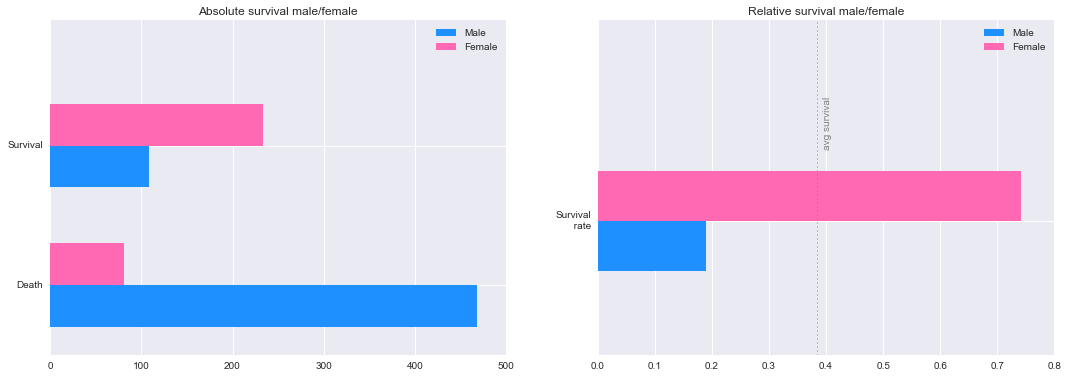

In [7]:
#We seperate male/female and use the value_counts to sort between survival/death
t_male = titanic_data[titanic_data['Sex'] == 'male']
t_female = titanic_data[titanic_data['Sex'] == 'female']
t_male_surv = t_male[t_male['Survived'] == 1]
t_female_surv = t_female[t_female['Survived'] == 1]
t_male_surv_rate = float(t_male.Survived.sum()) / t_male.Survived.count()
t_female_surv_rate = float(t_female.Survived.sum()) / t_female.Survived.count()

#Get the overall average survival rate by summing the survivors and divide by the total number of people
avg_survival = float(titanic_data['Survived'].sum()) / float(titanic_data['Survived'].count())

#Next we set up a space for plotting
fig = plt.figure(figsize=(18,6))

#let's plot the male/female survival/death as a horizontal bar chart and look at the absolute vs. relative values
ax1 = fig.add_subplot(121)
y_pos1 = np.arange(len(t_male.Survived.value_counts()))
width = 0.3
ax1.barh(y_pos1, t_male.Survived.value_counts().sort_index(), width, edgecolor='none', color='dodgerblue', label='Male')
ax1.barh(y_pos1 + width, t_female.Survived.value_counts().sort_index(), width, edgecolor='none', color='hotpink', label='Female')
ax1.set(yticks=y_pos1 + width, yticklabels=['Death', 'Survival'], ylim=[-0.2, len(y_pos1)+0.2])
ax1.set_title('Absolute survival male/female')
ax1.legend(loc='best')

ax2 = fig.add_subplot(122)
y_pos2 = np.arange(1)
ax2.barh(y_pos2, t_male_surv_rate, width, edgecolor='none', color='dodgerblue', label='Male')
ax2.barh(y_pos2 + width, t_female_surv_rate, width, edgecolor='none', color='hotpink', label='Female')
ax2.set(yticks=y_pos2 + width, yticklabels=['Survival\n rate'], ylim=[-0.5, 1.5])
ax2.set_title('Relative survival male/female')
ax2.legend(loc='best')

#Show the overall average survival rate
ax2.axvline(x=avg_survival, linewidth=1, color='grey', ls=':')
ax2.text(avg_survival + 0.01, 1,'avg survival',rotation=90, color='grey')

We can see that a lot more women survived the tragedy eventhough there were a lot more men aboard the ship. When we look at the relative numbers this becomes even clearer. The overall survival rate is .38, but that doesn't show the huge difference between men and women. Next we will explore the differences in age and class and see if there is an impact on survival rate.

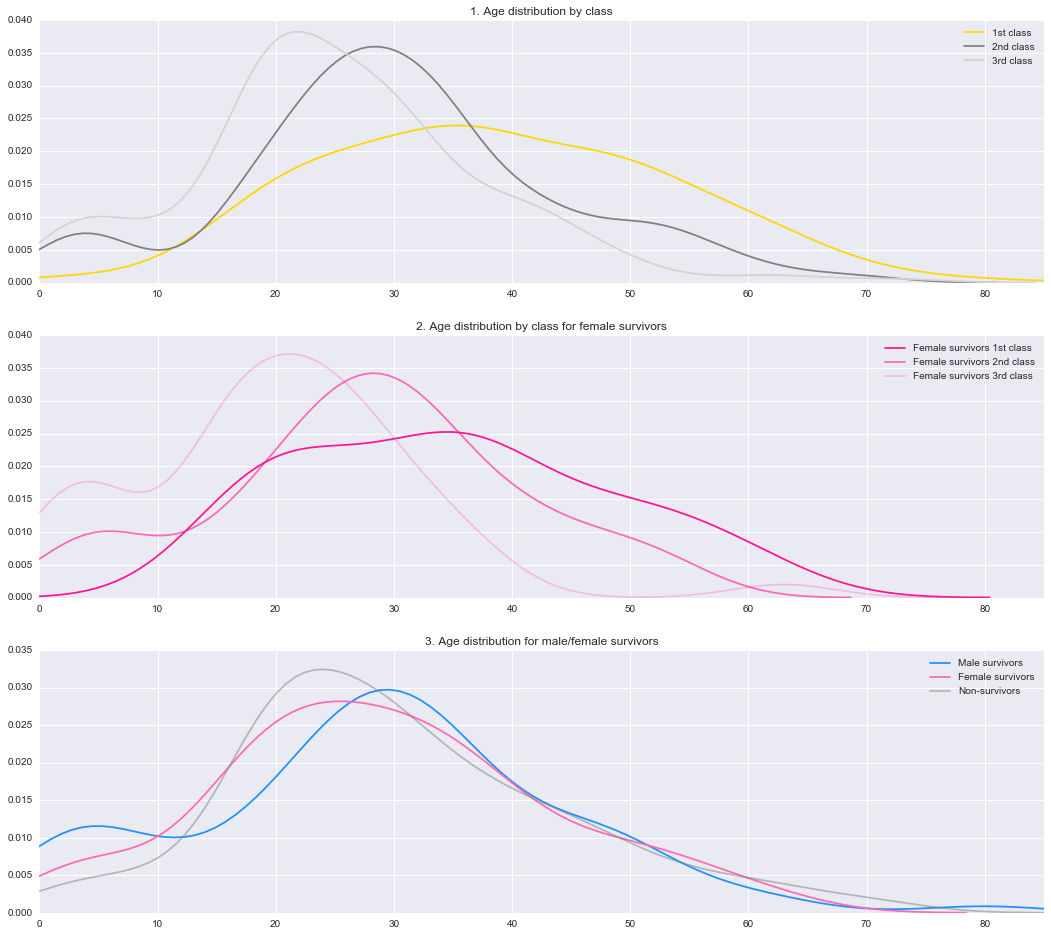

In [8]:
#We've seen that the lowest age is 0.42, we can't really be sure if these are supposed to be 
#babies or errors in the data, but since there are only 7 of them, 
#we'll omit those when looking at the age data as well as the NaN's of course
t_age = titanic_data[titanic_data['Age'] >= 1].copy()
t_age['Age'] = t_age['Age'].astype('int')
t_age_survived = t_age[t_age['Survived'] == 1]

#Next we set up a new space for plotting age data
fig = plt.figure(figsize=(18,16))

#Start by looking at the overall age distribution
ax1 = fig.add_subplot(311)
ax1.set(xlim=[0,85])
ax1.set_title('1. Age distribution by class')
sns.kdeplot(t_age.Age[t_age['Pclass'] == 1], color='gold', label='1st class')
sns.kdeplot(t_age.Age[t_age['Pclass'] == 2], color='gray', label='2nd class')
sns.kdeplot(t_age.Age[t_age['Pclass'] == 3], color='lightgray', label='3rd class')

#Then look into the age distribution by class for female survivors
ax2 = fig.add_subplot(312)
ax2.set(xlim=[0,85])
ax2.set_title('2. Age distribution by class for female survivors')
sns.kdeplot(t_age_survived.Age[(t_age_survived['Sex'] == 'female') & (t_age_survived['Pclass'] == 1)], color='deeppink', label='Female survivors 1st class', alpha=1)
sns.kdeplot(t_age_survived.Age[(t_age_survived['Sex'] == 'female') & (t_age_survived['Pclass'] == 2)], color='deeppink', label='Female survivors 2nd class', alpha=0.6)
sns.kdeplot(t_age_survived.Age[(t_age_survived['Sex'] == 'female') & (t_age_survived['Pclass'] == 3)], color='deeppink', label='Female survivors 3rd class', alpha=0.2)

#Then look at the difference in age distribution for male/female survivors
ax3 = fig.add_subplot(313)
ax3.set(xlim=[0,85])
ax3.set_title('3. Age distribution for male/female survivors')
sns.kdeplot(t_age_survived.Age[t_age_survived['Sex'] == 'male'], color='dodgerblue', label='Male survivors')
sns.kdeplot(t_age_survived.Age[t_age_survived['Sex'] == 'female'], color='hotpink', label='Female survivors')
sns.kdeplot(t_age.Age[t_age['Survived'] == 0], color='grey', label='Non-survivors', alpha=0.5)

What do we see in the images above? First of all, we're looking at the age distribution by class. This gives us a general idea of the differences in class and age aboard the HMS Titanic. The third class tends to be younger, whereas the first class seems to be more evenly distributed.
Looking at the second image, we start to see some differences. Two features jump out. First of all we see that compared to the general distribution of first class passengers there are more young (age 15-25) female survivors in first class. This is confirmed when we look at the third image, where we see that the age distribution for female survivors is shifted tot left a little, compared to male survivors. Secondly, we notice that there is a drop in middle-aged (age 40-60) female passengers in third class. 

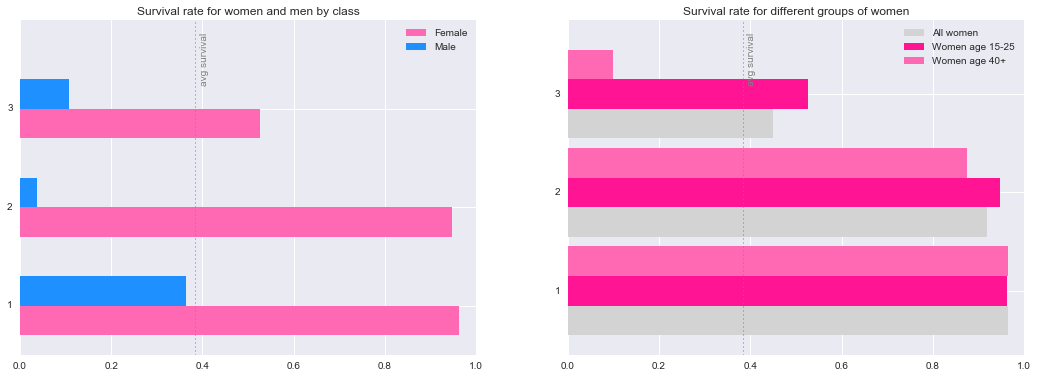

In [9]:
#Let's see if we can do some more comparisons for these two age groups (15-25 / 40+), we start by grouping them. 
t_15_25 = t_age[(t_age['Age'] >= 15) & (t_age['Age'] <= 25)]
t_40_60 = t_age[(t_age['Age'] >= 40)]
t_15_25_class_male = t_15_25[t_15_25['Sex'] == 'male'].groupby(['Pclass'])
t_15_25_class_female = t_15_25[t_15_25['Sex'] == 'female'].groupby(['Pclass'])
t_40_60_class_female = t_40_60[t_40_60['Sex'] == 'female'].groupby(['Pclass'])
t_all_class_female = t_age[t_age['Sex'] == 'female'].groupby(['Pclass'])

#We use sum() and count() the calculate the rate which is easy since survival is indicated by 0/1
t_15_25_class_female_rate = t_15_25_class_female.Survived.sum().astype('float64') / t_15_25_class_female.Survived.count()
t_15_25_class_male_rate = t_15_25_class_male.Survived.sum().astype('float64') / t_15_25_class_male.Survived.count()
t_40_60_class_female_rate = t_40_60_class_female.Survived.sum().astype('float64') / t_40_60_class_female.Survived.count()
t_all_class_female = t_all_class_female.Survived.sum().astype('float64') / t_all_class_female.Survived.count()

#Set up our drawing space
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
y_pos = np.arange(len(t_15_25_class_female))
width = 0.3
female_bar = ax1.barh(y_pos, t_15_25_class_female_rate , width, edgecolor='none', color='hotpink', label='Female')
male_bar = ax1.barh(y_pos + width, t_15_25_class_male_rate, width, edgecolor='none', color='dodgerblue', label='Male')
ax1.set(yticks=y_pos + width, yticklabels=t_15_25_class_female.sum().index, ylim=[-0.2, len(y_pos)+0.2])
ax1.set_title('Survival rate for women and men by class')
ax1.legend(loc='best')

#The second graph
ax2 = fig.add_subplot(122)

#Set up the bars
y_pos2 = np.arange(len(t_15_25_class_female))
women_all = ax2.barh(y_pos2, t_all_class_female, width, edgecolor='none', color='lightgray', label='All women')
women_15_25 = ax2.barh(y_pos2 + width, t_15_25_class_female_rate, width, edgecolor='none', color='deeppink', label='Women age 15-25')
women_40_60 = ax2.barh(y_pos2 + width*2, t_40_60_class_female_rate, width, edgecolor='none', color='hotpink', label='Women age 40+')
ax2.set(yticks=y_pos + width*1.5, yticklabels=t_15_25_class_female.sum().index, ylim=[-0.2, len(y_pos)+0.2])
ax2.set_title('Survival rate for different groups of women')
ax2.legend(loc='best')

#Show the overall average survival rate
ax1.axvline(x=avg_survival, linewidth=1, color='grey', ls=':')
ax1.text(avg_survival + 0.01, 3,'avg survival',rotation=90, color='grey')
ax2.axvline(x=avg_survival, linewidth=1, color='grey', ls=':')
ax2.text(avg_survival + 0.01, 3,'avg survival',rotation=90, color='grey')

Here we see some interesting things. First of all, it is clear that if you were a woman in first or second class, you were in luck, because you were very likely to survive. Interestingly though, for the women in third class, being over 40 had you at a disadvantage whereas being between the age of 15-25 increased your chance of survival compared to others in third class. There is a clear difference in class for both male and female, although on the male side this is merely the difference between first class and the others, as we see that the survival rate for third class is actually higher than for second class, though for females it's the other way around.

So, are 40+ women in 2nd and 1st class significantly more likely to have survived than 40+ women in 3rd class? Let's look at the data and perform a test.

In [19]:
print t_40_60_class_female.Survived.describe()

Pclass       
1       count    28.000000
        mean      0.964286
        std       0.188982
        min       0.000000
        25%       1.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
2       count    16.000000
        mean      0.875000
        std       0.341565
        min       0.000000
        25%       1.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
3       count    10.000000
        mean      0.100000
        std       0.316228
        min       0.000000
        25%       0.000000
        50%       0.000000
        75%       0.000000
        max       1.000000
dtype: float64


It looks like we have narrowed it down a lot, our group of women over 40 in third class consists of only 10 people. A t-test still works for small n's, but we do need to watch our effect size (Cohen's d). This concept is nicely visualised by Kristoffer Magnussen: http://rpsychologist.com/d3/NHST/. We can see that the larger our effect size, the less likely it is we encounter a type II error (and wrongly dismiss our hypothesis).

Let's assume as our null hypothesis that the mean survival rate for our population of women in third class is equal to or higher than the mean survival rate for women in both first and second class.   
*H0: µ(third class) ≥ µ(first & second class)*  

The alternative hypothesis is that the mean survival rate for the population of women in third class is lower than women in both first and second class.   
*H1: µ(third class) < µ(first & second class)*

Consistent with our hypotheses we will do a *one-tailed t-test.* We will reject the null hypothesis if our t-statistic has a p-value lower than .05.

In [58]:
first_second_class = np.append(t_40_60_class_female.get_group(1).Survived, t_40_60_class_female.get_group(2).Survived)
third_class = t_40_60_class_female.get_group(3).Survived
ttest_40_60 = stats.ttest_ind(third_class, first_second_class, equal_var=False)

# calculate Cohen's D to see if the effect size is large enough with this n
def cohen_d(a,b):
    return (np.mean(a) - np.mean(b)) / (np.sqrt((np.std(a) ** 2 + np.std(b) ** 2) / 2))

d_40_60 = cohen_d(third_class, first_second_class)

print "The t-statistic is %.3f with a p-value of %.4f" % ttest_40_60
print "Cohen's d is: %.3f" % d_40_60

The t-statistic is -7.764 with a p-value of 0.0000
Cohen's d is: -3.002


These results show that we can reject our null hypothesis and accept the alternative hypothesis that the mean survival rate for women in third class age 40 and over is significantly different from those in first and second class.

Let's do exactly the same for women age 15-25:

In [21]:
print t_15_25_class_female.Survived.describe()

Pclass       
1       count    26.000000
        mean      0.961538
        std       0.196116
        min       0.000000
        25%       1.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
2       count    19.000000
        mean      0.947368
        std       0.229416
        min       0.000000
        25%       1.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
3       count    38.000000
        mean      0.526316
        std       0.506009
        min       0.000000
        25%       0.000000
        50%       1.000000
        75%       1.000000
        max       1.000000
dtype: float64


In [59]:
first_second_class = np.append(t_15_25_class_female.get_group(1).Survived, t_15_25_class_female.get_group(2).Survived)
third_class = t_15_25_class_female.get_group(3).Survived
ttest_15_25 = stats.ttest_ind(third_class, first_second_class, equal_var=False)

# calculate Cohen's D to see if the effect size is large enough with this n
d_15_25 = cohen_d(third_class, first_second_class)

print "The t-statistic is %.3f with a p-value of %.4f" % ttest_15_25
print "Cohen's d is: %.3f" % d_15_25

The t-statistic is -4.891 with a p-value of 0.0000
Cohen's d is: -1.124


We see that the effect size is smaller, as was to be expected from looking at the bar chart, but it is still significant for this age group with a p smaller than 0.05.

Let's continue our investigation and look at our final question of whether missing values in the age or cabin column have an effect on the mean survival rate.

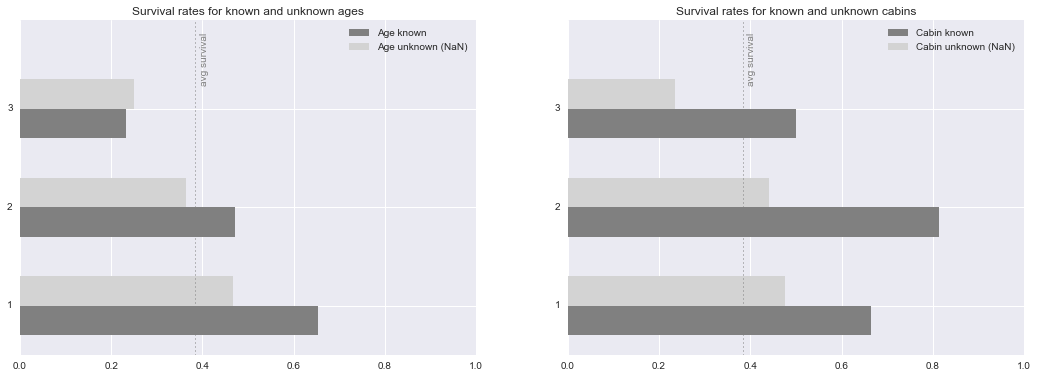

In [12]:
#Get the survival rates for people with entries missing (NaN) in the Age and Cabin columns, grouped by class:
t_age_nan = titanic_data[titanic_data['Age'].isnull()]
t_age_nan_by_class = t_age_nan.groupby(['Pclass'])
t_age_nan_rate_by_class = t_age_nan_by_class.Survived.sum().astype('float64') / t_age_nan_by_class.Survived.count()
t_age_by_class = t_age.groupby(['Pclass'])
t_age_rate_by_class = t_age_by_class.Survived.sum().astype('float64') / t_age_by_class.Survived.count()

t_cabin_nan = titanic_data[titanic_data['Cabin'].isnull()]
t_cabin = titanic_data[titanic_data['Cabin'].notnull()]
t_cabin_nan_by_class = t_cabin_nan.groupby(['Pclass'])
t_cabin_nan_rate_by_class = t_cabin_nan_by_class.Survived.sum().astype('float64') / t_cabin_nan_by_class.Survived.count()
t_cabin_by_class = t_cabin.groupby(['Pclass'])
t_cabin_rate_by_class = t_cabin_by_class.Survived.sum().astype('float64') / t_cabin_by_class.Survived.count()

#Set up a new drawing space
fig = plt.figure(figsize=(18,6))

#plot the rates for known and missing ages
ax1 = fig.add_subplot(121)
y_pos = np.arange(len(t_age_nan_rate_by_class))
width = 0.3
age_bar = ax1.barh(y_pos, t_age_rate_by_class.sort_index() , width, edgecolor='none', color='grey', label='Age known')
age_nan_bar = ax1.barh(y_pos + width, t_age_nan_rate_by_class.sort_index() , width, edgecolor='none', color='lightgrey', label='Age unknown (NaN)')
ax1.set(yticks=y_pos + width, yticklabels=t_age_nan_rate_by_class.index, ylim=[-0.2, len(y_pos)+0.2], xlim=[0,1])
ax1.set_title('Survival rates for known and unknown ages')
ax1.legend(loc='best')

#And for known and missing cabins
ax2 = fig.add_subplot(122)
y_pos2 = np.arange(len(t_cabin_nan_rate_by_class))
cabin_bar = ax2.barh(y_pos2, t_cabin_rate_by_class.sort_index() , width, edgecolor='none', color='grey', label='Cabin known')
cabin_nan_bar = ax2.barh(y_pos2 + width, t_cabin_nan_rate_by_class.sort_index() , width, edgecolor='none', color='lightgrey', label='Cabin unknown (NaN)')
ax2.set(yticks=y_pos2 + width, yticklabels=t_age_nan_rate_by_class.index, ylim=[-0.2, len(y_pos2)+0.2], xlim=[0,1])
ax2.set_title('Survival rates for known and unknown cabins')
ax2.legend(loc='best')

#Show the overall average survival rate
ax1.axvline(x=avg_survival, linewidth=1, color='grey', ls=':')
ax1.text(avg_survival + 0.01, 3,'avg survival',rotation=90, color='grey')
ax2.axvline(x=avg_survival, linewidth=1, color='grey', ls=':')
ax2.text(avg_survival + 0.01, 3,'avg survival',rotation=90, color='grey')


We can see how there are differences in survival rate for different classes based on whether age is missing. But let's see if overall there is a significant effect.

Let's assume as our null hypothesis that the mean survival rate for our population with a missing entry in the age column is equal to or higher than the mean survival rate for our population with a known age. 
*H0: µ(missing) ≥ µ(known)*  

The alternative hypothesis is that the mean survival rate for our population with a missing entry in the age column is lower than the mean survival rate for our population with a known age. 
*H1: µ(missing) < µ(known)*

Consistent with our hypotheses we will do a *one-tailed t-test.* We will reject the null hypothesis if our t-statistic has a p-value lower than .05.

In [60]:
ttest_age_nan = stats.ttest_ind(t_age_nan.Survived, t_age.Survived, equal_var=False)

# calculate Cohen's D to see if the effect size is large enough with this n
d_age_nan = cohen_d(t_age_nan.Survived, t_age.Survived)

print "The t-statistic is %.3f with a p-value of %.4f" % ttest_age_nan
print "Cohen's d is: %.3f" % d_age_nan

The t-statistic is -2.733 with a p-value of 0.0067
Cohen's d is: -0.225


It looks like there is a small but still significant effect with a p < 0.05. 

## Conclusion

In conclusion we can say that although many more women than men survived the tragedy with the HMS Titanic, there is still a significant difference between classes and age groups. Women in third class had a significantly lower chance of survival, although women aged 15-25 had a higher chance than women aged 40+. 

With regards to missing values we can conclude that people with no recorded age are significantly less likely to have survived the accident.

### Sources:

A couple of articles and webpages have been of great help and inspiration in making this.
* The Matplotlib documentation: http://matplotlib.org/examples/api/barchart_demo.html
* Andrew Conti's exploration of the Titanic Data: http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
* http://stats.stackexchange.com/questions/37993/is-there-a-minimum-sample-size-required-for-the-t-test-to-be-valid
* http://stackoverflow.com/questions/22611446/perform-2-sample-t-test
* 2 Sample t-Test (unequal sample sizes and unequal variances):  http://www.unm.edu/~marcusj/2Sampletex2.pdf